In [27]:
import pandas as pd
df = pd.read_csv("C:/Users/Admin/Documents/Datasets/Cars93.csv")

In [28]:
df.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [29]:
# df.info()   # Non-Null column below indicates missing values where Non-Null<93
import numpy as np
removed = df.Manufacturer
removed[0] = np.nan
df['Manufacturer'] = removed
df.head()

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,NaN,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [30]:
# ! pip install missingno --user

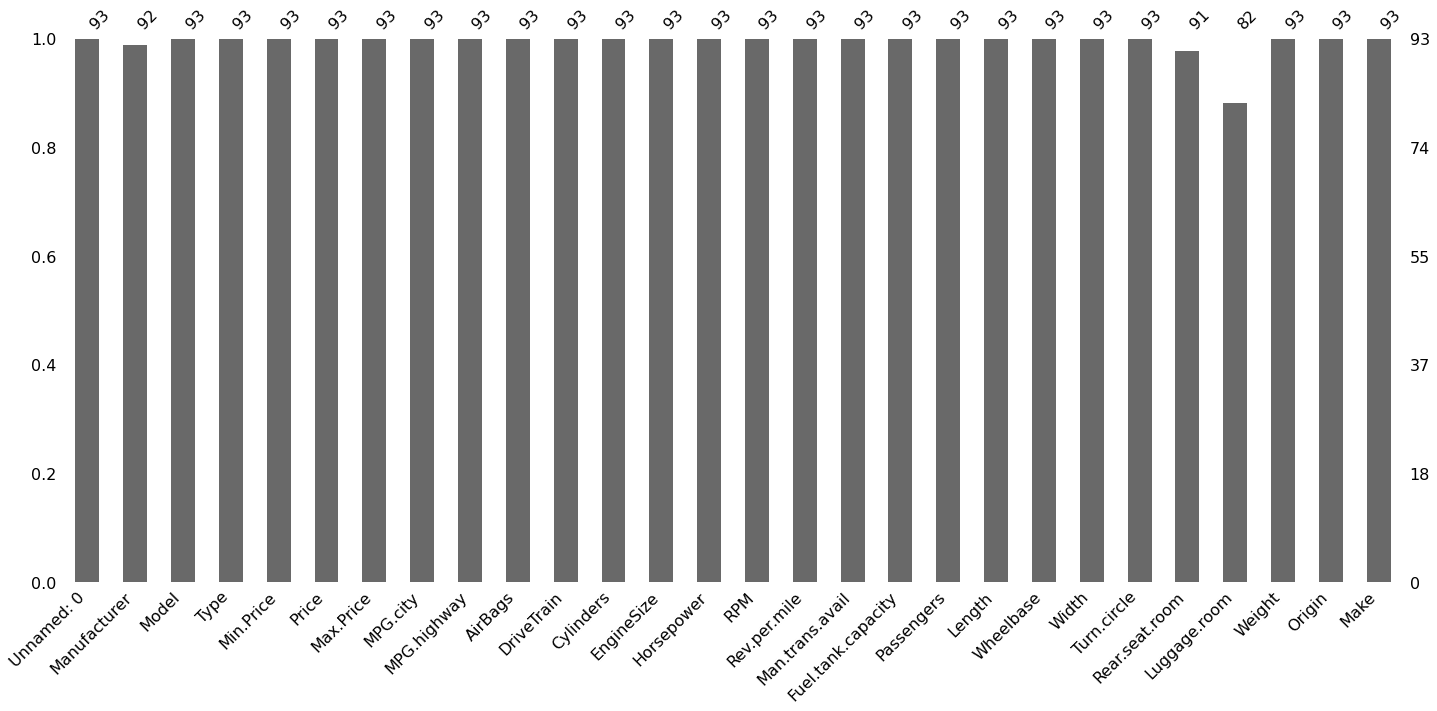

In [31]:
import missingno as mo
mo.bar(df)

In [32]:
df.isna().any()
df.isna().any().any()  # Check whether Dataset has any missing values

True

# Imputer

In [33]:
from sklearn.impute import SimpleImputer
import numpy as np
cat = []
con = []
for i in df.columns:
    if(df[i].dtype=='object'):
        cat.append(i)
    else:
        con.append(i)
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imputed = imp.fit_transform(df[con])
df_imputed = pd.DataFrame(imputed, columns=con)
df_imputed.head()

,Unnamed: 0,Min.Price,Price,Max.Price,MPG.city,MPG.highway,EngineSize,Horsepower,RPM,Rev.per.mile,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight
0,1.0,12.9,15.9,18.8,25.0,31.0,1.8,140.0,6300.0,2890.0,13.2,5.0,177.0,102.0,68.0,37.0,26.5,11.0,2705.0
1,2.0,29.2,33.9,38.7,18.0,25.0,3.2,200.0,5500.0,2335.0,18.0,5.0,195.0,115.0,71.0,38.0,30.0,15.0,3560.0
2,3.0,25.9,29.1,32.3,20.0,26.0,2.8,172.0,5500.0,2280.0,16.9,5.0,180.0,102.0,67.0,37.0,28.0,14.0,3375.0
3,4.0,30.8,37.7,44.6,19.0,26.0,2.8,172.0,5500.0,2535.0,21.1,6.0,193.0,106.0,70.0,37.0,31.0,17.0,3405.0
4,5.0,23.7,30.0,36.2,22.0,30.0,3.5,208.0,5700.0,2545.0,21.1,4.0,186.0,109.0,69.0,39.0,27.0,13.0,3640.0


In [34]:
# ! pip install sklearn_pandas --user
# ! pip install scikit-learn -U

In [35]:
from sklearn.impute import SimpleImputer
from IPython import display
display.display(df[cat])
cat_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Default

cat_imputed = cat_imp.fit_transform(df[cat])
df_cat_imputed = pd.DataFrame(cat_imputed, columns=cat)
df_cat_imputed.head()

,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,NaN,Integra,Small,None,Front,4,Yes,non-USA,Acura Integra
1,Acura,Legend,Midsize,Driver & Passenger,Front,6,Yes,non-USA,Acura Legend
2,Audi,90,Compact,Driver only,Front,6,Yes,non-USA,Audi 90
3,Audi,100,Midsize,Driver & Passenger,Front,6,Yes,non-USA,Audi 100
4,BMW,535i,Midsize,Driver only,Rear,4,Yes,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...
88,Volkswagen,Eurovan,Van,None,Front,5,Yes,non-USA,Volkswagen Eurovan
89,Volkswagen,Passat,Compact,None,Front,4,Yes,non-USA,Volkswagen Passat
90,Volkswagen,Corrado,Sporty,None,Front,6,Yes,non-USA,Volkswagen Corrado
91,Volvo,240,Compact,Driver only,Rear,4,Yes,non-USA,Volvo 240


,Manufacturer,Model,Type,AirBags,DriveTrain,Cylinders,Man.trans.avail,Origin,Make
0,Chevrolet,Integra,Small,None,Front,4,Yes,non-USA,Acura Integra
1,Acura,Legend,Midsize,Driver & Passenger,Front,6,Yes,non-USA,Acura Legend
2,Audi,90,Compact,Driver only,Front,6,Yes,non-USA,Audi 90
3,Audi,100,Midsize,Driver & Passenger,Front,6,Yes,non-USA,Audi 100
4,BMW,535i,Midsize,Driver only,Rear,4,Yes,non-USA,BMW 535i
